In [55]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [56]:
# baca dataset
df=pd.read_csv("arrhythmia.csv", header=None)

In [57]:
# baca 5 data pertama
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [58]:
# baca 5 data terakhir
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


Deskripsi singkat dataframe

In [59]:
# dimensi dataset
df.shape

(452, 280)

In [60]:
# https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/
# info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [61]:
# deskripsi dataset
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


Mengolah value bernilai null

In [62]:
# https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/
# pengecekan missing values
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
275    0
276    0
277    0
278    0
279    0
Length: 280, dtype: int64

In [63]:
# https://stackoverflow.com/questions/53979403/search-for-a-value-anywhere-in-a-pandas-dataframe
# pengecekan missing values dengan simbol ?
df.isin(['?']).any(1)

/var/folders/q9/2yhglz9s49x803xtvk27z7nw0000gn/T/ipykernel_3333/980683166.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df.isin(['?']).any(1)


0       True
1       True
2      False
3       True
4       True
       ...  
447     True
448     True
449    False
450    False
451     True
Length: 452, dtype: bool

In [64]:
# https://datatofish.com/count-nan-pandas-dataframe/
# cek jumlah ?
df.isin(['?']).sum().sum()

408

In [65]:
# https://stackoverflow.com/questions/53668421/replace-a-string-value-with-nan-in-pandas-data-frame-python
# replace ? dengan NaN
df=df.replace('?', np.nan)

In [66]:
# https://datatofish.com/count-nan-pandas-dataframe/
# cek jumlah ?
df.isin(['?']).sum().sum()

0

In [67]:
# cek nan values
df.isna().sum().sum()

408

Visualisasi distribusi value bernilai null

Text(0, 0.5, 'Total value null')

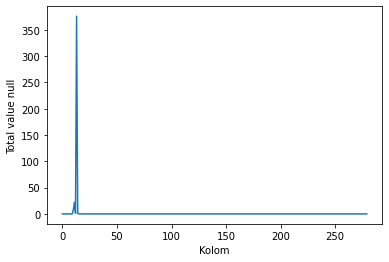

In [68]:
# distribusi nan value berdasarkan kolom
pd.isnull(df).sum().plot()
plt.xlabel('Kolom')
plt.ylabel('Total value null')

Text(0, 0.5, 'Total value null')

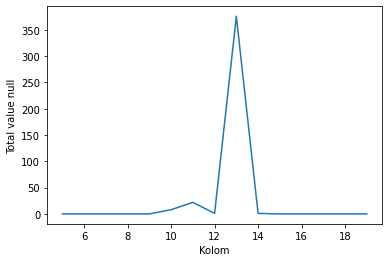

In [69]:
# distribusi nan value berdasarkan kolom lebih detail
pd.isnull(df).sum()[5:20].plot()
plt.xlabel('Kolom')
plt.ylabel('Total value null')

Text(0, 0.5, 'Total value null')

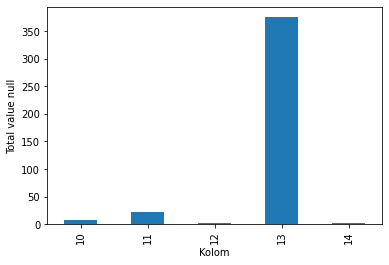

In [70]:
# distribusi nan value berdasarkan kolom lebih detail
pd.isnull(df).sum()[10:15].plot(kind="bar")
plt.xlabel('Kolom')
plt.ylabel('Total value null')

In [71]:
# drop kolom 13
df=df.drop(columns=13)

Mengisi value bertipe nan dengan rata-rata pada kolom

In [72]:
# https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns
# rubah tipe objek menjadi numeric
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [73]:
# https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
# rubah nan menjadi rata-rata perkolom
df = df.fillna(df.mean())
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [74]:
# cek nan values
df.isna().sum().sum()

0

Dataset final

In [75]:
namaKolom=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R_Prime_Wave","S_Prime_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII28", "DII29","DII30", "DII31", "DII32","DII33","DII34","DII35","DII36","DII37","DII38","DII39",
"DIII40","DIII41","DIII42", "DIII43", "DIII44","DIII45","DIII46","DIII47","DIII48","DIII49","DIII50","DIII51",
"AVR52","AVR53","AVR54","AVR55","AVR56","AVR57","AVR58","AVR59","AVR60","AVR61","AVR62","AVR63",
"AVL64","AVL65","AVL66","AVL67","AVL68","AVL69","AVL70","AVL71","AVL72","AVL73","AVL74","AVL75",
"AVF76","AVF77","AVF78","AVF79","AVF80","AVF81","AVF82","AVF83","AVF84","AVF85","AVF86","AVF87",
"V188","V189","V190","V191","V192","V193","V194","V195","V196","V197","V198","V199",
"V2100","V2101","V2102","V2103","V2104","V2105","V2106","V2107","V2108","V2109","V2110","V2111",
"V3112","V3113","V3114","V3115","V3116","V3117","V3118","V3119","V3120","V3121","V3122","V3123",
"V4124","V4125","V4126","V4127","V4128","V4129","V4130","V4131","V4132","V4133","V4134","V4135",
"V5136","V5137","V5138","V5139","V5140","V5141","V5142","V5143","V5144","V5145","V5146","V5147",
"V6148","V6149","V6150","V6151","V6152","V6153","V6154","V6155","V6156","V6157","V6158","V6159",
"Amp_JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","Amp_R_Prime_Wave","Amp_S_Prime_Wave","Amp_P_Wave","Amp_T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","ClassCode"]

In [76]:
# menggabungkan nama kolom dengan dataset
df.columns = namaKolom
df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,ClassCode
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [84]:
# https://www.kaggle.com/code/asamad06/multiclass-classification-using-neural-network
# pisahkan kolom ClassCode
y = df["ClassCode"]
x = df.drop(["ClassCode"], axis=1)
x = np.array(x)
y = np.array(y)
x[:10], y[:10]

(array([[ 75. ,   0. , 190. , ...,   2.9,  23.3,  49.4],
        [ 56. ,   1. , 165. , ...,   2.1,  20.4,  38.8],
        [ 54. ,   0. , 172. , ...,   3.4,  12.3,  49. ],
        ...,
        [ 49. ,   1. , 162. , ...,   0.5,  15.8,  19.8],
        [ 44. ,   0. , 168. , ...,   2.1,  12.5,  30.9],
        [ 50. ,   1. , 167. , ...,   0.9,  20.1,  25.1]]),
 array([ 8,  6, 10,  1,  7, 14,  1,  1,  1, 10]))

In [85]:
# melakukan encode pada kolom classcode
l_encode = LabelEncoder()
l_encode.fit(y)
y = l_encode.transform(y)
y = to_categorical(y)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [86]:
# memisah dataset menjadi 2
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.3, random_state = 0)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((316, 278), (316, 13), (136, 278), (136, 13))

Epoch 1/50
10/10 [==============================] - 2s 56ms/step - loss: 1.8842 - accuracy: 0.4968 - val_loss: 1.8070 - val_accuracy: 0.5294
Epoch 2/50
10/10 [==============================] - 0s 26ms/step - loss: 1.7265 - accuracy: 0.5475 - val_loss: 1.7806 - val_accuracy: 0.5294
Epoch 3/50
10/10 [==============================] - 0s 29ms/step - loss: 1.6883 - accuracy: 0.5475 - val_loss: 1.7795 - val_accuracy: 0.5294
Epoch 4/50
10/10 [==============================] - 0s 25ms/step - loss: 1.7044 - accuracy: 0.5475 - val_loss: 1.7505 - val_accuracy: 0.5294
Epoch 5/50
10/10 [==============================] - 0s 26ms/step - loss: 1.6825 - accuracy: 0.5475 - val_loss: 1.7877 - val_accuracy: 0.5294
Epoch 6/50
10/10 [==============================] - 0s 24ms/step - loss: 1.6919 - accuracy: 0.5475 - val_loss: 1.7348 - val_accuracy: 0.5294
Epoch 7/50
10/10 [==============================] - 0s 25ms/step - loss: 1.7126 - accuracy: 0.5475 - val_loss: 1.7599 - val_accuracy: 0.5294
Epoch 8/50
10

[]

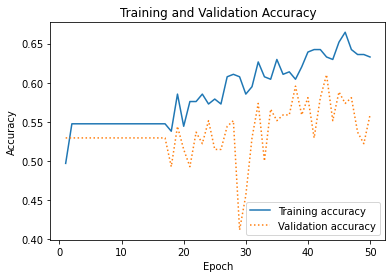

In [90]:
# algoritma ann
df_len = len(df.columns)-1

model = Sequential()
model.add(Dense(452, input_dim = df_len, activation = 'sigmoid'))
model.add(Dense(452, activation = 'sigmoid'))
model.add(Dense(452, activation = 'sigmoid'))
model.add(Dense(452, activation = 'sigmoid'))
model.add(Dense(452, activation = 'sigmoid'))
model.add(Dense(452, activation = 'sigmoid'))
model.add(Dense(452, activation = 'sigmoid'))
model.add(Dense(452, activation = 'sigmoid'))
model.add(Dense(13, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
hist = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=50)
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()
